c:\ProgramData\miniconda3\envs\ml_env\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1, 'linear'] before, using random point [0.01, 'linear']
  warnings.warn(
c:\ProgramData\miniconda3\envs\ml_env\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 'linear'] before, using random point [0.1, 'linear']
  warnings.warn(
c:\ProgramData\miniconda3\envs\ml_env\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1, 'linear'] before, using random point [1, 'linear']
  warnings.warn(
c:\ProgramData\miniconda3\envs\ml_env\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [100, 'linear'] before, using random point [100, 'linear']
  warnings.warn(
c:\ProgramData\miniconda3\envs\ml_env\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective h

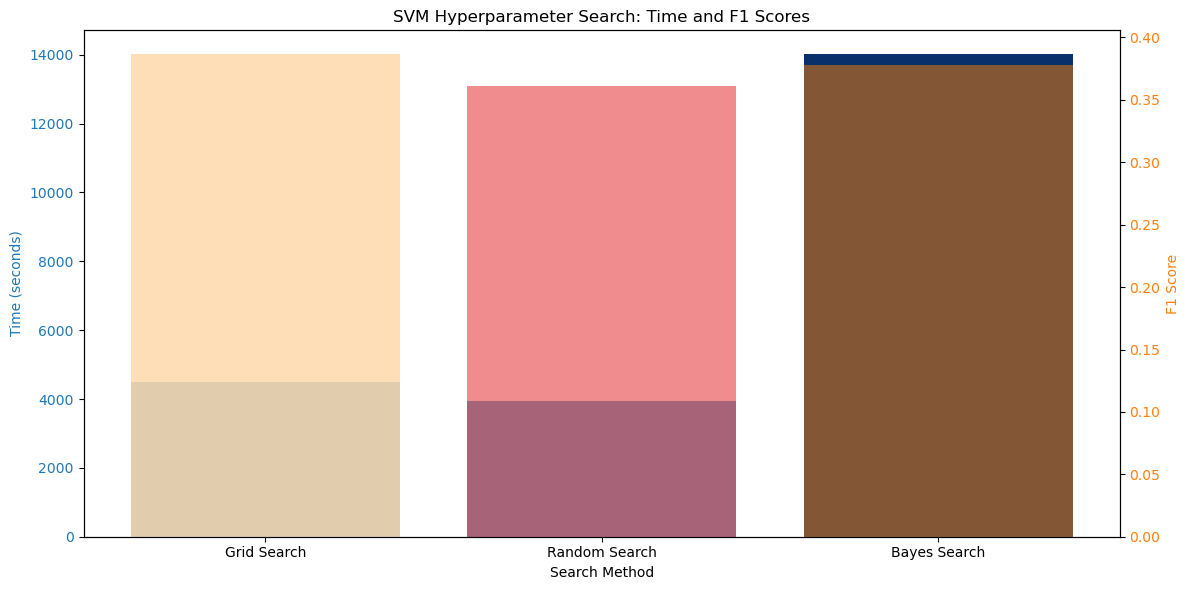

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV
import numpy as np

# Load the dataset
file_path = r"C:\Users\Administrator\Documents\ML PROJECT\DATA\prepared_narrowed_all_outliers_dropped.csv"
df = pd.read_csv(file_path)
X = df.drop(columns=['Phase'])
y = df['Phase'] - 1

# Define parameter grids based on kernel type
param_grid = [
    {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['rbf', 'sigmoid'], 'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]},
    {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['poly'], 'degree': [2, 3, 4, 5], 'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]}
]

# Set the metric for evaluation
scoring = 'f1_macro'

# To store the results
svm_results = {
    "grid_search_time": None,
    "grid_search_f1": None,
    "random_search_time": None,
    "random_search_f1": None,
    "bayes_search_time": None,
    "bayes_search_f1": None
}

# Grid Search
start_time = time.time()
grid_search = GridSearchCV(SVC(), param_grid, scoring=scoring, cv=5, n_jobs=-1)
grid_search.fit(X, y)
svm_results["grid_search_time"] = time.time() - start_time
svm_results["grid_search_f1"] = grid_search.best_score_

# Random Search
random_iter = int(0.6 * sum(len(v) for d in param_grid for v in d.values()))
start_time = time.time()
random_search = RandomizedSearchCV(SVC(), param_distributions=param_grid, n_iter=random_iter, scoring=scoring, cv=5, n_jobs=-1, random_state=42)
random_search.fit(X, y)
svm_results["random_search_time"] = time.time() - start_time
svm_results["random_search_f1"] = random_search.best_score_

# Bayes Search
start_time = time.time()
bayes_search = BayesSearchCV(SVC(), param_grid, n_iter=random_iter, scoring=scoring, cv=5, n_jobs=-1, random_state=42)
bayes_search.fit(X, y)
svm_results["bayes_search_time"] = time.time() - start_time
svm_results["bayes_search_f1"] = bayes_search.best_score_

# Plotting the results
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Search Method')
ax1.set_ylabel('Time (seconds)', color=color)
ax1.bar(['Grid Search', 'Random Search', 'Bayes Search'], 
        [svm_results["grid_search_time"], svm_results["random_search_time"], svm_results["bayes_search_time"]],
        color=['#c6dbef', '#6baed6', '#08306b'])
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('F1 Score', color=color)
ax2.bar(['Grid Search', 'Random Search', 'Bayes Search'], 
        [svm_results["grid_search_f1"], svm_results["random_search_f1"], svm_results["bayes_search_f1"]],
        alpha=0.5, color=['#fdbf6f', '#e31a1c', '#ff7f00'])
ax2.tick_params(axis='y', labelcolor=color)

plt.title('SVM Hyperparameter Search: Time and F1 Scores')
fig.tight_layout()
plt.show()

   Search Method  Time (seconds)  F1 Score
0    Grid Search     4480.028346  0.386420
1  Random Search     3950.432905  0.360925
2   Bayes Search    14009.141475  0.377861


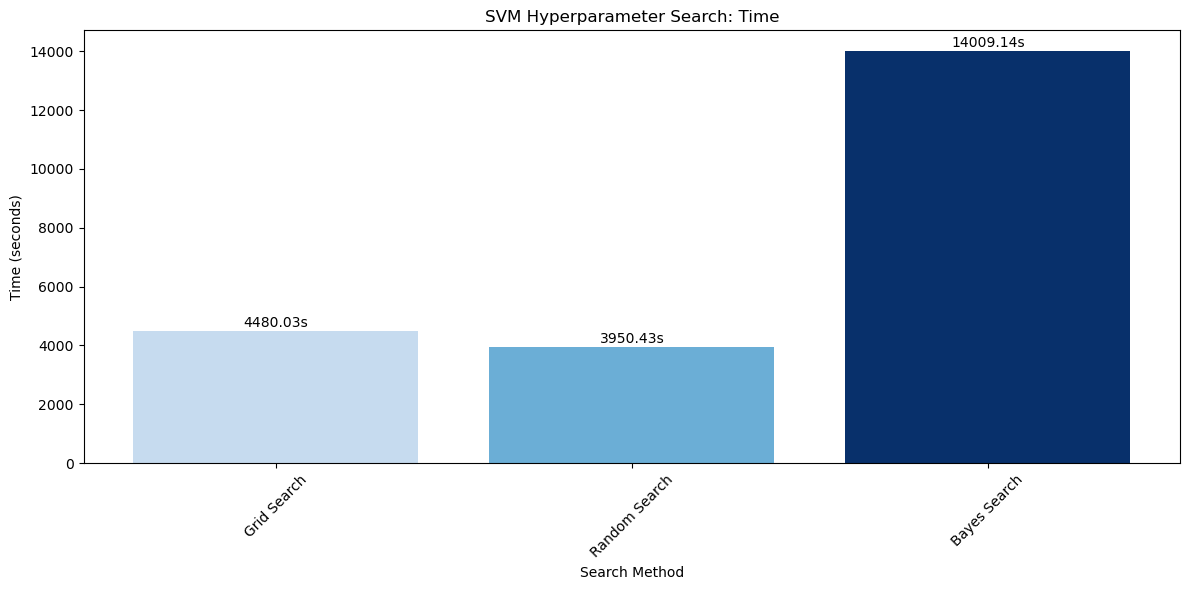

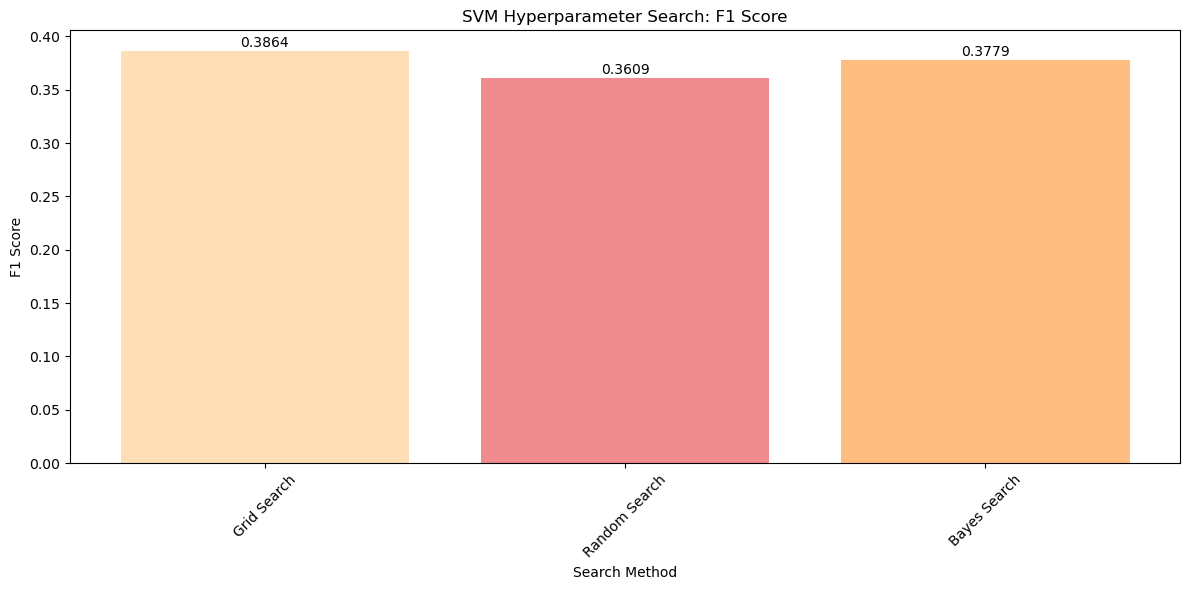

In [4]:
# Create and print a table with results
results_df = pd.DataFrame({
    'Search Method': ['Grid Search', 'Random Search', 'Bayes Search'],
    'Time (seconds)': [svm_results["grid_search_time"], svm_results["random_search_time"], svm_results["bayes_search_time"]],
    'F1 Score': [svm_results["grid_search_f1"], svm_results["random_search_f1"], svm_results["bayes_search_f1"]]
})

print(results_df)

# Plotting the results: Time
plt.figure(figsize=(12, 6))
plt.bar(['Grid Search', 'Random Search', 'Bayes Search'], 
        [svm_results["grid_search_time"], svm_results["random_search_time"], svm_results["bayes_search_time"]],
        color=['#c6dbef', '#6baed6', '#08306b'])
plt.xlabel('Search Method')
plt.ylabel('Time (seconds)')
plt.title('SVM Hyperparameter Search: Time')
plt.xticks(rotation=45)
for i, v in enumerate([svm_results["grid_search_time"], svm_results["random_search_time"], svm_results["bayes_search_time"]]):
    plt.text(i, v + max(svm_results["grid_search_time"], svm_results["random_search_time"], svm_results["bayes_search_time"]) * 0.01, f"{v:.2f}s", ha='center', fontsize=10)
plt.tight_layout()
plt.show()

# Plotting the results: F1 Score
plt.figure(figsize=(12, 6))
plt.bar(['Grid Search', 'Random Search', 'Bayes Search'], 
        [svm_results["grid_search_f1"], svm_results["random_search_f1"], svm_results["bayes_search_f1"]],
        alpha=0.5, color=['#fdbf6f', '#e31a1c', '#ff7f00'])
plt.xlabel('Search Method')
plt.ylabel('F1 Score')
plt.title('SVM Hyperparameter Search: F1 Score')
plt.xticks(rotation=45)
for i, v in enumerate([svm_results["grid_search_f1"], svm_results["random_search_f1"], svm_results["bayes_search_f1"]]):
    plt.text(i, v + max(svm_results["grid_search_f1"], svm_results["random_search_f1"], svm_results["bayes_search_f1"]) * 0.01, f"{v:.4f}", ha='center', fontsize=10)
plt.tight_layout()
plt.show()